In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import pathlib
import seaborn as sns
import pandas as pd
sns.set_context('talk')
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path_list = [
    # "/storage/vbutoi/scratch/ESE/training/08_24_24_HeptaticVessel_LowerLR",
    "/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS",
    # "/storage/vbutoi/scratch/ESE/training/08_26_24_HepaticVessel_wSVLS_LONGTRAINING",
]

df_list = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list.append(df)
    except Exception as e:
        print(e)
df = pd.concat(df_list)

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [3]:
for ikey in df.keys():
    print(ikey)

phase
epoch
loss
area_estimation_error
dice_score
ece_loss
data
iters_per_epoch
label
resolution
root_folder
task
train_splits
val_splits
batch_size
num_workers
pin_memory
seed
loss_func
batch_reduction
from_logits
model
image_channels
num_classes
optim
lr
weight_decay
base_checkpoint
base_pretrained_dir
base_pt_select_metric
epochs
eval_freq
path


In [4]:
def calibrator(path):
    if 'SVLS' in str(path):
        return 'SVLS'
    else:
        return 'None'
    
df.augment(calibrator)

In [5]:
df['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195543-JRGQ-f049a2d188426e227a1615e8f12afc44'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195547-7ATZ-fde4509b7c0e64ed901bcba175ee37f8'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195014-BJKC-aac8a102f4f200f66a60b9bd1e1d985f'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195551-XT4V-7c54a8078c3c9bcf9d5386a45fcb0be4'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195531-S1TD-ab75bf756b0bb8333e6aad5b7a838745'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195027-YUD9-70cf6ec7acf9bd4ec8977e0e36b9e892'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195830-V4S9-33806692f52610c167d0ad4f8f2a1c41'),
      

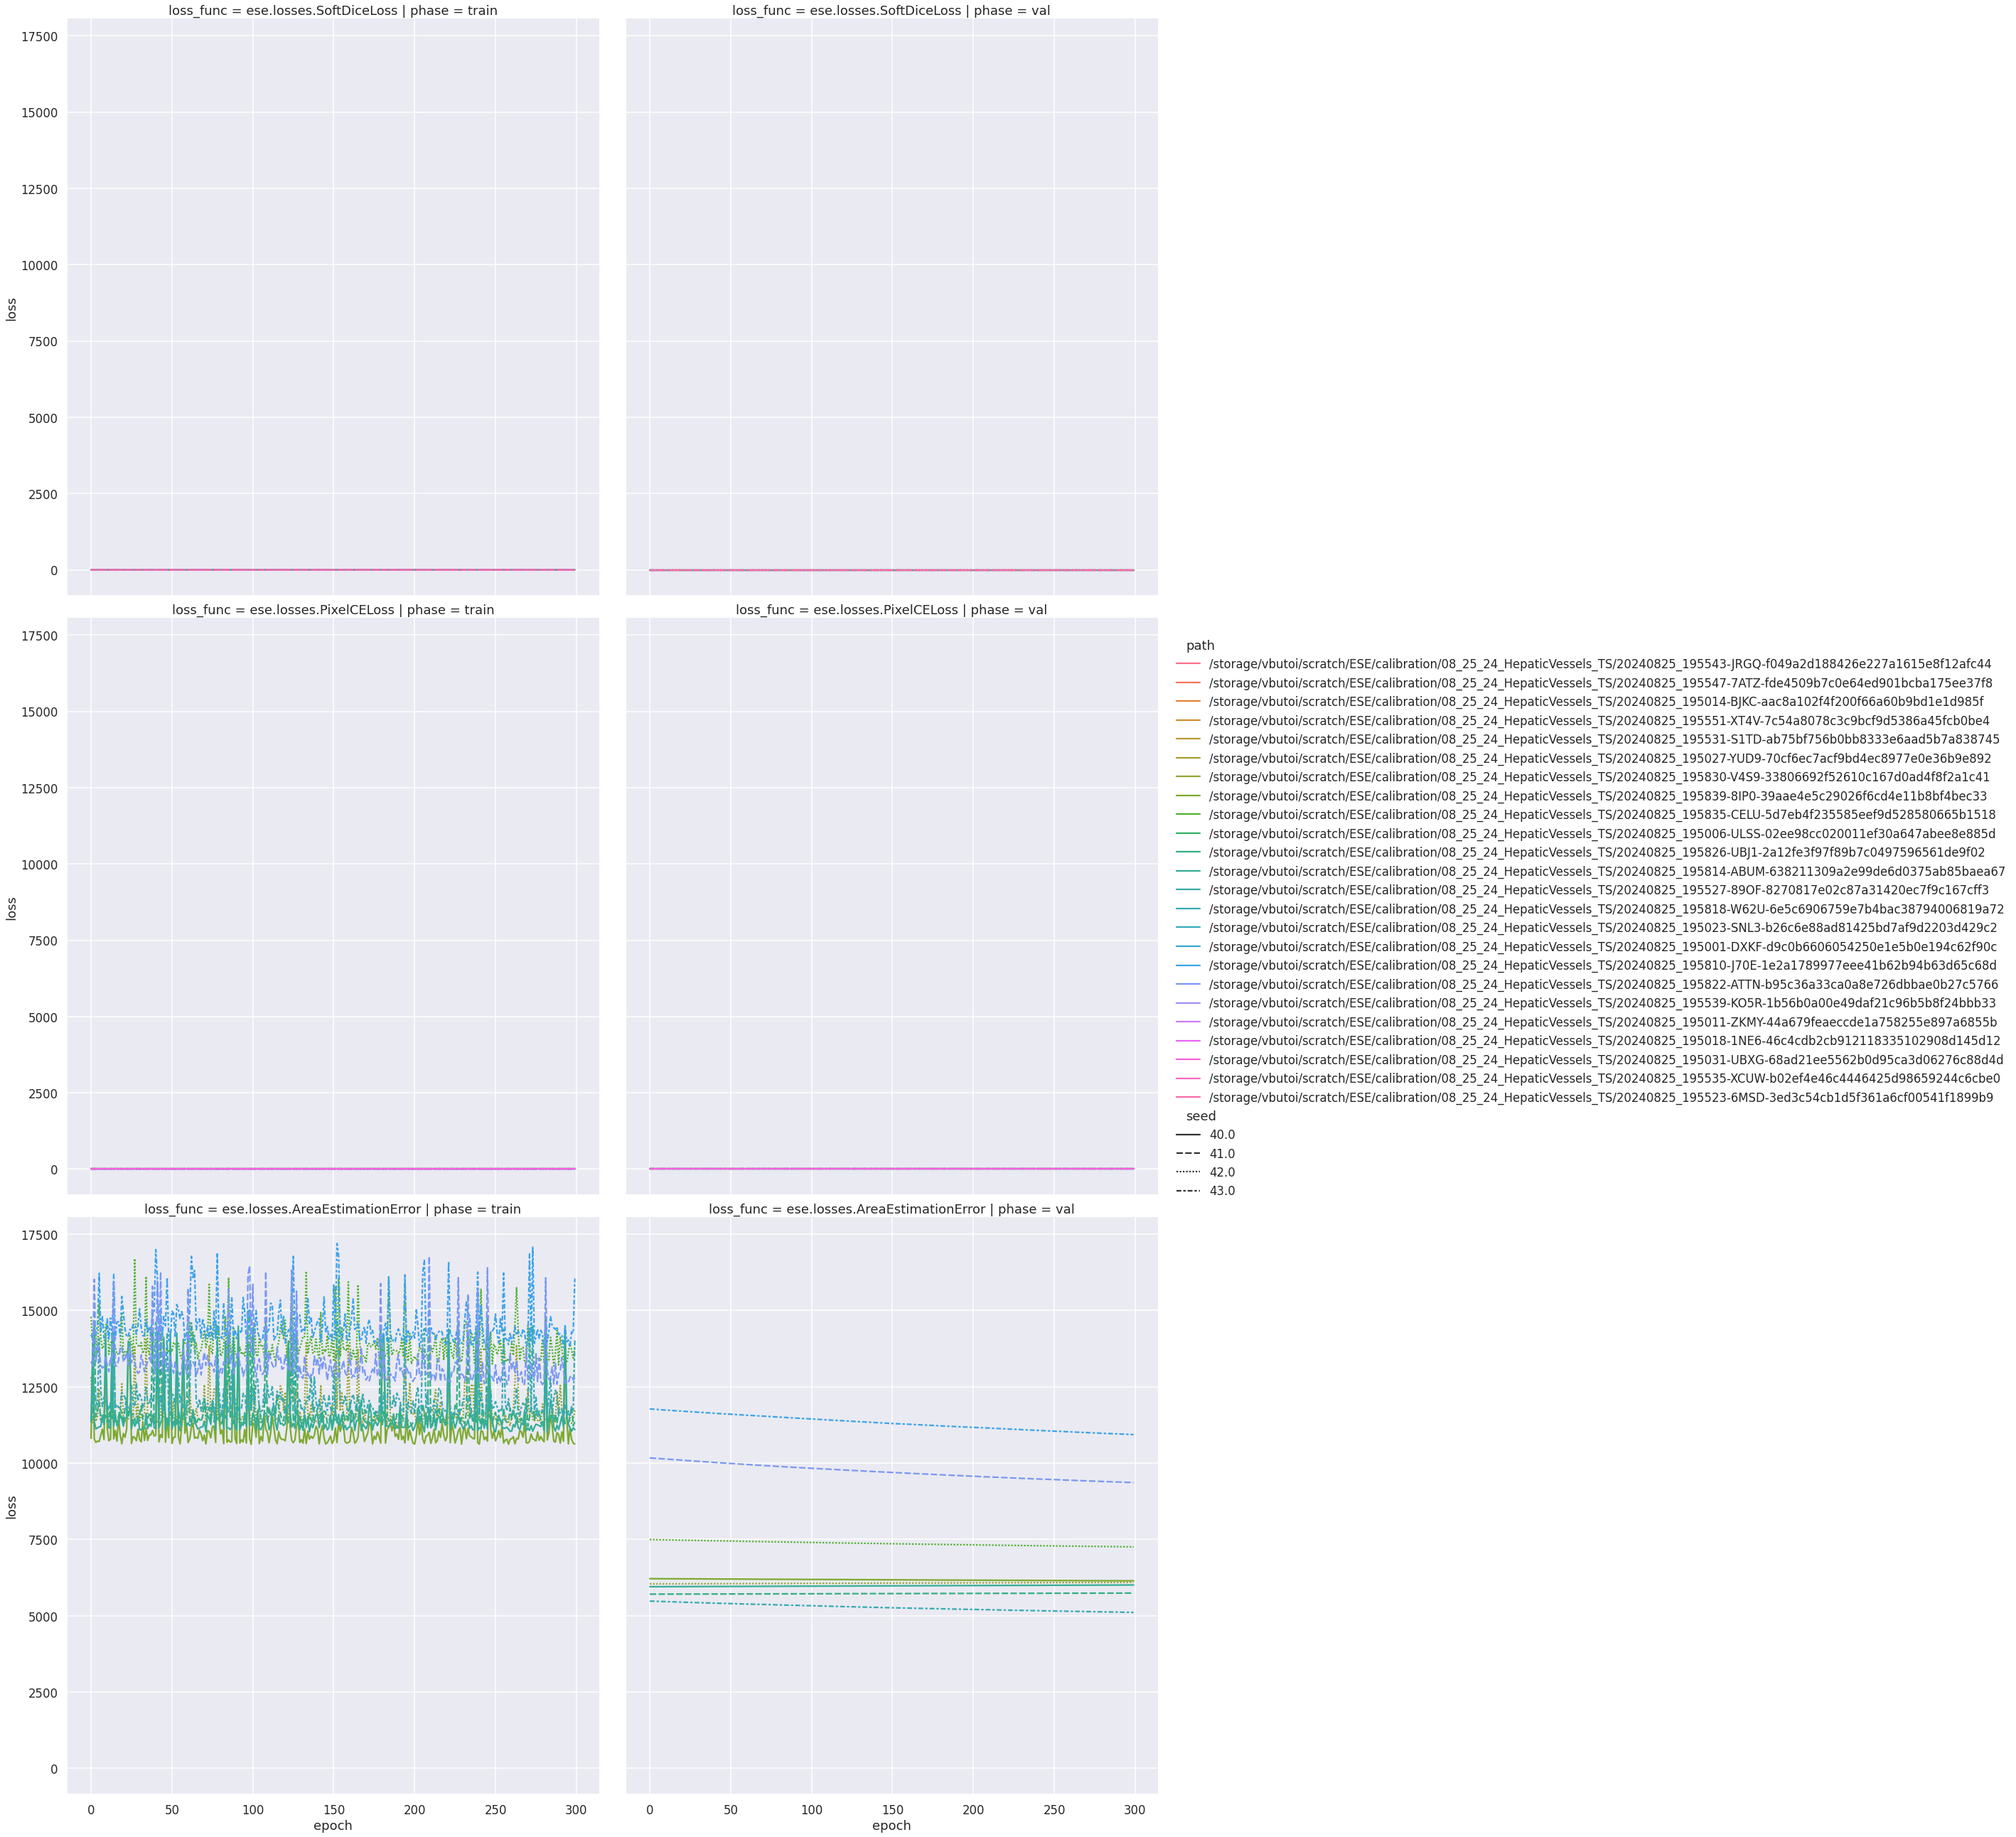

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    hue='path',
    style='seed',   
    col='phase',
    row='loss_func',
    kind='line',
    height=12,
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

In [7]:
df.select(loss_func='ese.losses.PixelCELoss')['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195014-BJKC-aac8a102f4f200f66a60b9bd1e1d985f'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195027-YUD9-70cf6ec7acf9bd4ec8977e0e36b9e892'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195006-ULSS-02ee98cc020011ef30a647abee8e885d'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195023-SNL3-b26c6e88ad81425bd7af9d2203d429c2'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195001-DXKF-d9c0b6606054250e1e5b0e194c62f90c'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195011-ZKMY-44a679feaeccde1a758255e897a6855b'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_25_24_HepaticVessels_TS/20240825_195018-1NE6-46c4cdb2cb912118335102908d145d12'),
      

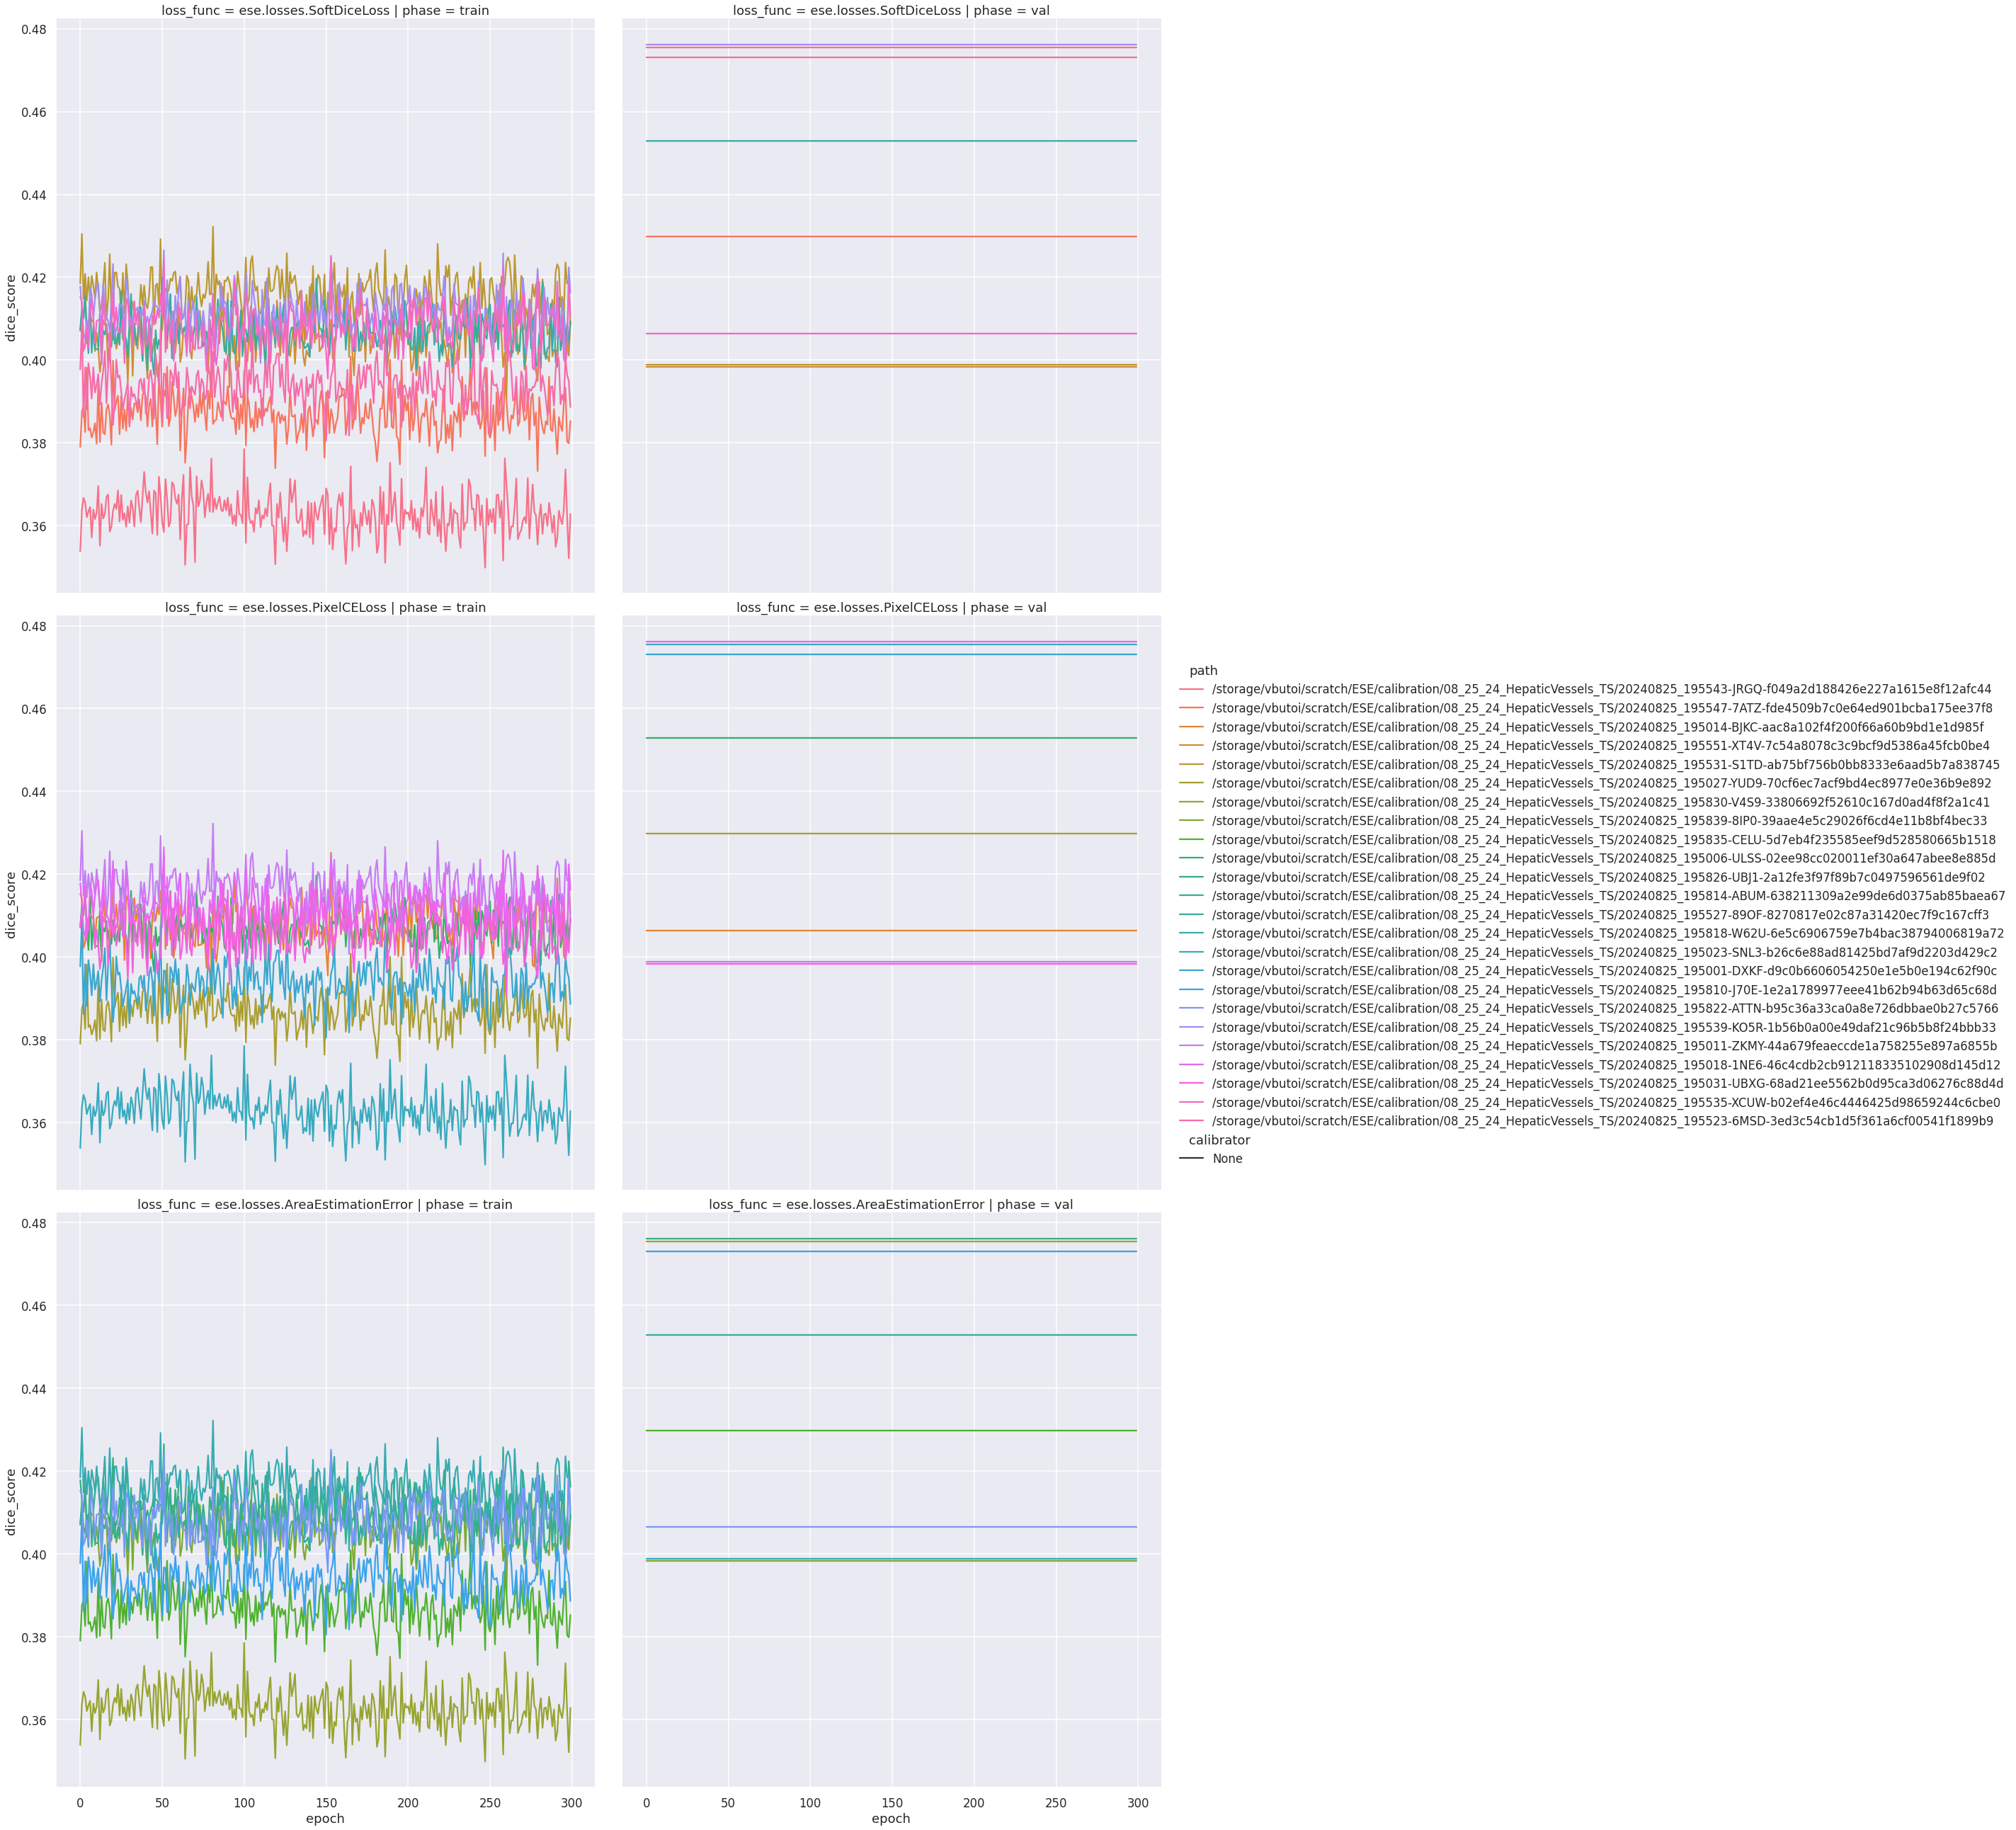

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    hue='path',
    style='calibrator',
    row='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

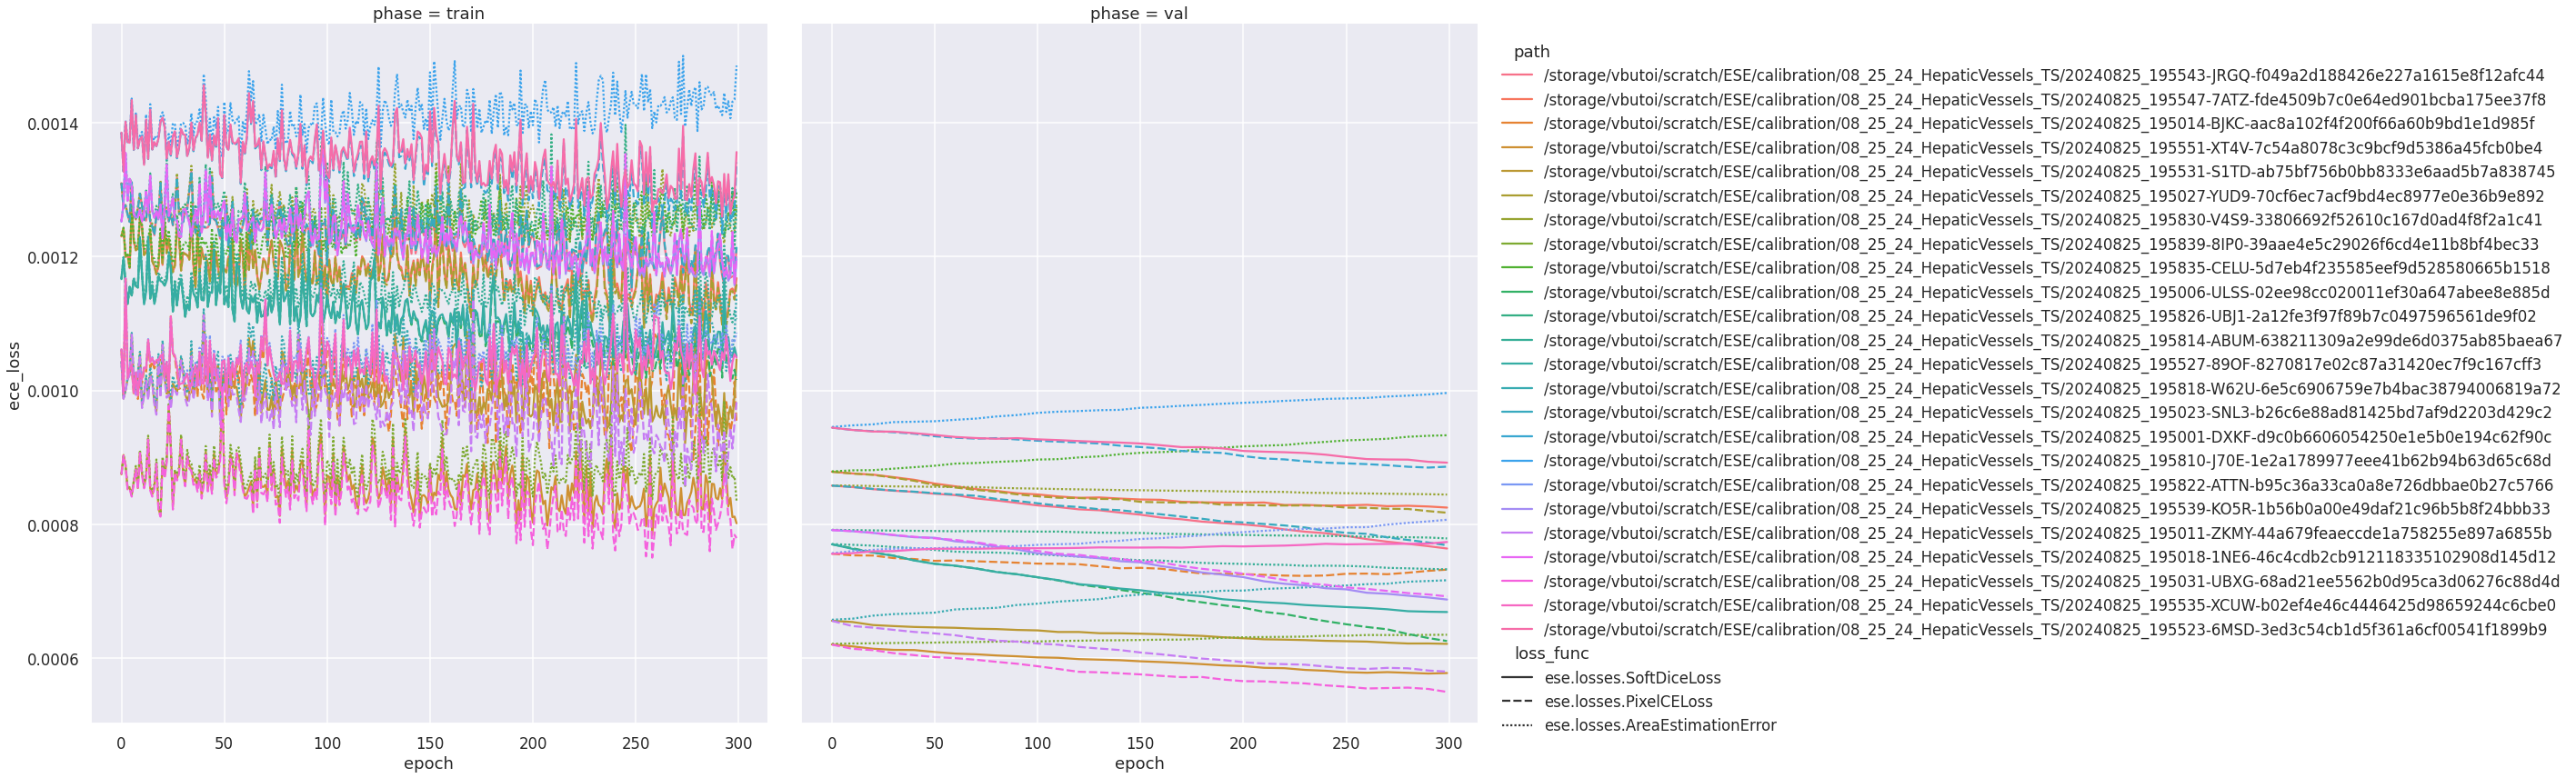

In [9]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

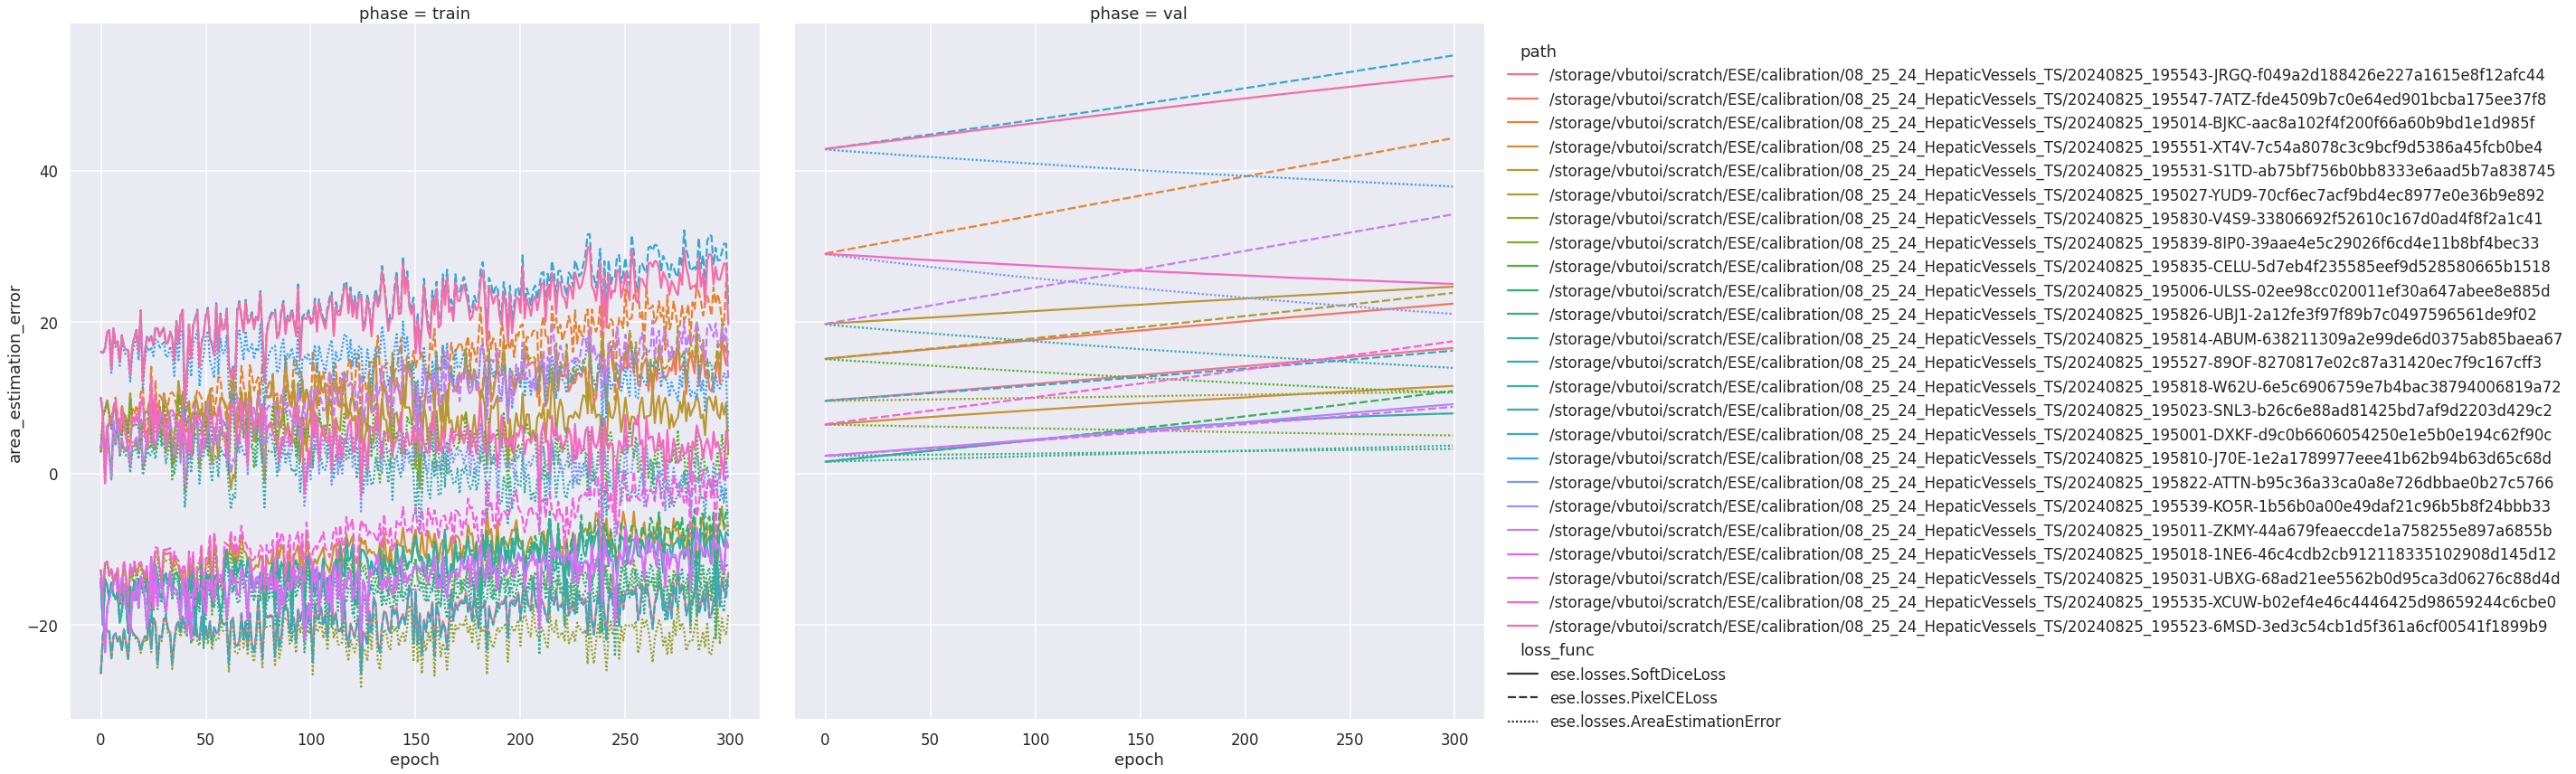

In [11]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='area_estimation_error',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))